In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [64]:
#Lets visualize the monthly trips taken in 2018/19 by both taxi cabs and for hire cars
monthly_trips_taxi = pd.read_csv('rides.csv')
monthly_trips_fhv = pd.read_csv('monthly_rides_fhv.csv')


In [66]:
print(monthly_trips_taxi) 

print(monthly_trips_fhv)

       Date    count
0   2018-01  8759531
1   2018-02  8491370
2   2018-03  9429041
3   2018-04  9305024
4   2018-05  9223745
5   2018-06  8713307
6   2018-07  7849230
7   2018-08  7848694
8   2018-09  8039664
9   2018-10  8820592
10  2018-11  8144740
11  2018-12  8172312
12  2019-01  7667255
13  2019-02  7018706
       Date     count
0   2018-01  19730570
1   2018-02  19301103
2   2018-03  21962470
3   2018-04  21034792
4   2018-05  21556113
5   2018-06  21118266
6   2018-07  21584891
7   2018-08  22101502
8   2018-09  22123605
9   2018-10  23266816
10  2018-11  22861081


Text(0.5, 0, 'Date [Month - Year]')

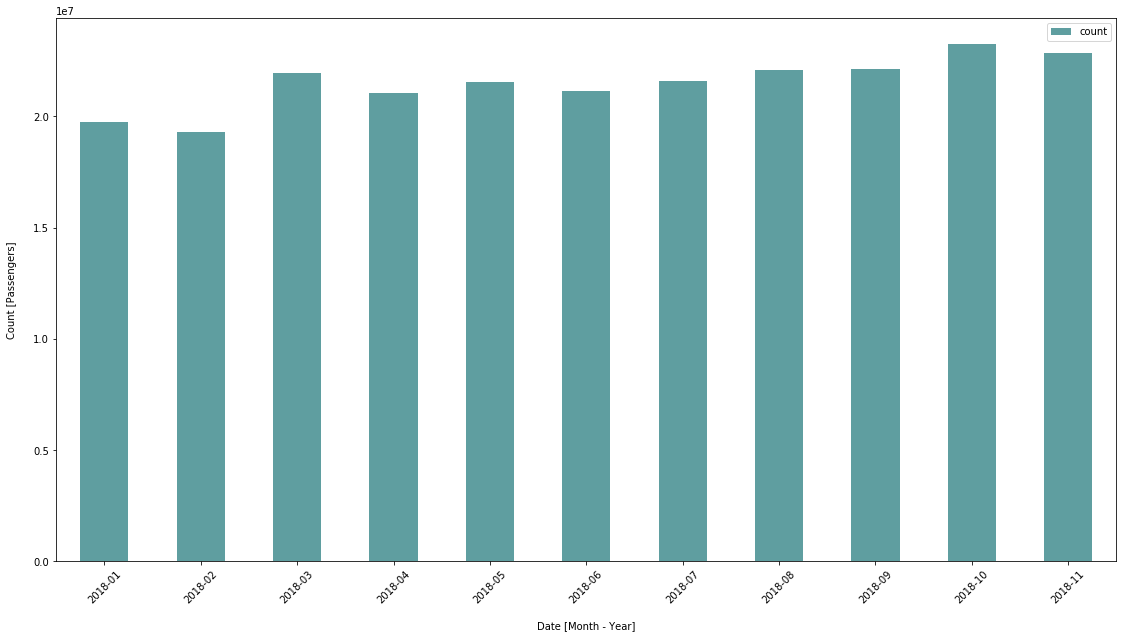

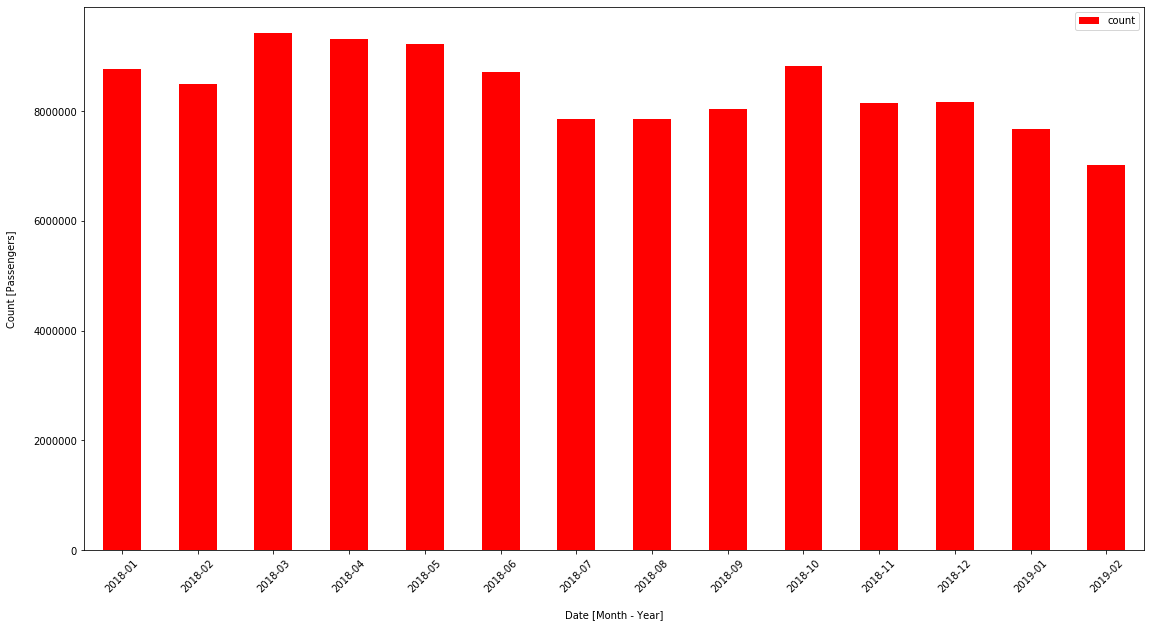

In [69]:
#First we make a bar graph to compare passanger count before and after august 2018

monthly_trips_fhv.plot(kind='bar', x= 'Date', y = 'count', figsize=(19, 10), color='cadetblue', rot=45)

plt.ylabel("Count [Passengers]", labelpad=16)
plt.xlabel("Date [Month - Year]", labelpad=16)

monthly_trips_taxi.plot(kind='bar', x= 'Date', y = 'count', figsize=(19, 10), color='red', rot=45)

plt.ylabel("Count [Passengers]", labelpad=16)
plt.xlabel("Date [Month - Year]", labelpad=16)

#First thing to notice is fhv passanger count is tremedously higher than taxi
#Second thing to notice is passanger count for taxi goes up after august, while fhv is average

In [60]:
monthly_trips_fhv.Date = pd.to_datetime(monthly_trips_fhv.Date)
monthly_trips_taxi.Date = pd.to_datetime(monthly_trips_taxi.Date)


In [61]:
monthly_trips_fhv.dtypes

Date     datetime64[ns]
count             int64
dtype: object

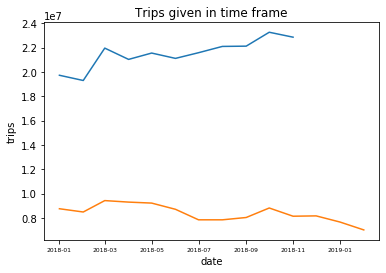

In [62]:
plt.plot(monthly_trips_fhv.Date, monthly_trips_fhv['count'])
plt.plot(monthly_trips_taxi.Date, monthly_trips_taxi['count'])
plt.xlabel('date')
plt.ylabel('trips')
plt.title('Trips given in time frame')
plt.tick_params(axis='x', which='major', labelsize=6)

#This line graph emphasizes the difference in passanger pickups between taxi and fhv

In [70]:
#Now lets read in a more acurate readings of passanger count and date grouped with day instead of month

df1 = pd.read_csv('/Users/eddy/taxi/hail.csv')
df1.head()

,trip_date,count
0,2018-01-01,237118
1,2018-01-02,238152
2,2018-01-03,266992
3,2018-01-04,122222
4,2018-01-05,265212


In [19]:
df1.dtypes

trip_date    datetime64[ns]
count                 int64
dtype: object

In [71]:
df1['trip_date'] = pd.to_datetime(df1['trip_date'])

In [72]:
df1.rename(columns={'count':'total_rides'}, inplace=True)

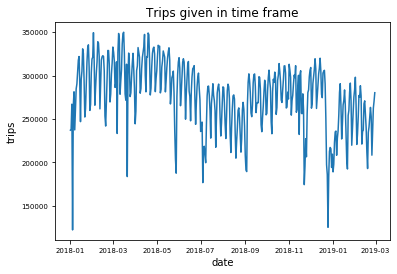

In [73]:
plt.plot(df1.trip_date, df1.total_rides)
plt.xlabel('date')
plt.ylabel('trips')
plt.title('Trips given in time frame')
plt.tick_params(axis='both', which='major', labelsize=7)

#Right off the bat we notice a steep decline of passengers to the start of the year

In [32]:
#Now we will use facebooks fbprophet to create a valuable prediction to passenger count in 2019

df1.columns = ['ds','y']
df1.head()

,ds,y
0,2018-01-01,237118
1,2018-01-02,238152
2,2018-01-03,266992
3,2018-01-04,122222
4,2018-01-05,265212


In [34]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [36]:
future_forcast= m1.make_future_dataframe(periods=250)
forcast1=m1.predict(future_forcast)
forcast1.tail().T

,669,670,671,672,673
ds,2019-11-01 00:00:00,2019-11-02 00:00:00,2019-11-03 00:00:00,2019-11-04 00:00:00,2019-11-05 00:00:00
trend,174827,174708,174588,174468,174349
yhat_lower,202270,188774,149755,159436,181982
yhat_upper,286306,271955,229909,238647,263021
trend_lower,159411,159198,158970,158758,158649
trend_upper,191239,191260,191253,191244,191246
additive_terms,66487.9,52420.5,14422.7,23580.7,46639.2
additive_terms_lower,66487.9,52420.5,14422.7,23580.7,46639.2
additive_terms_upper,66487.9,52420.5,14422.7,23580.7,46639.2
daily,45990.4,45990.4,45990.4,45990.4,45990.4


In [42]:
forcast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,272054.278662,235093.980354,309051.817145
1,2018-01-02,295184.851391,259666.468501,329686.874845
2,2018-01-03,303330.907550,265880.635101,338108.738704
3,2018-01-04,312358.316210,275664.291500,350905.901499
4,2018-01-05,315249.870644,277091.877259,351506.516002


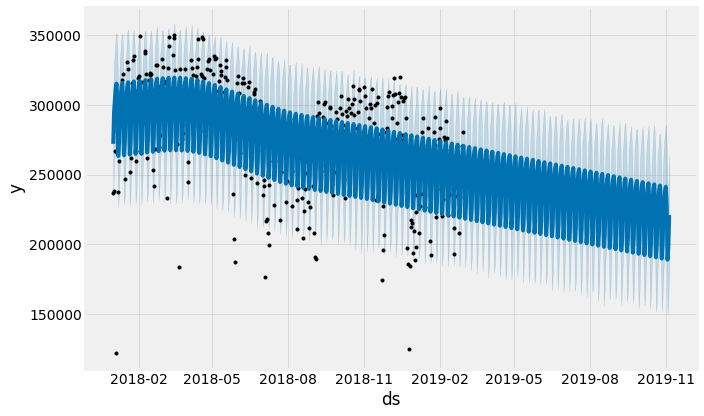

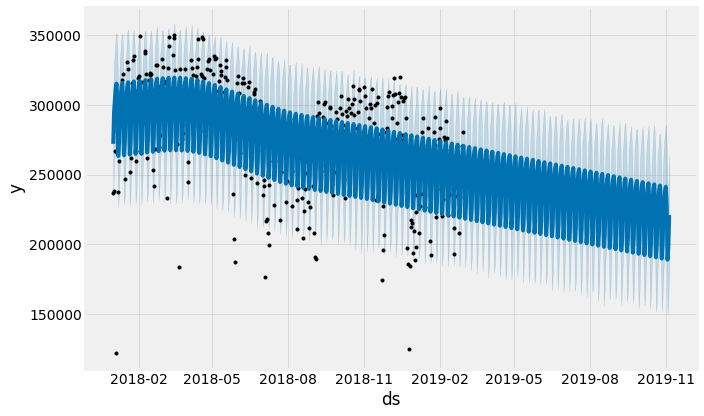

In [40]:
m1.plot(forcast1)

#With this forcast we see a downwards prediction for passengers taking taxi

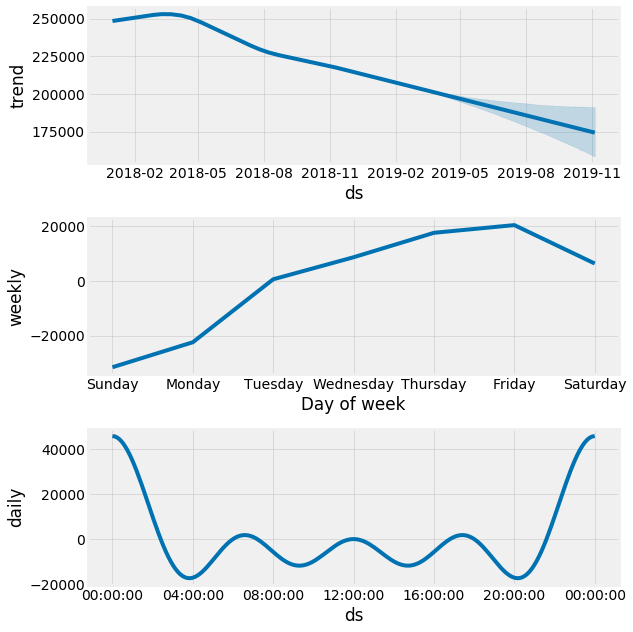

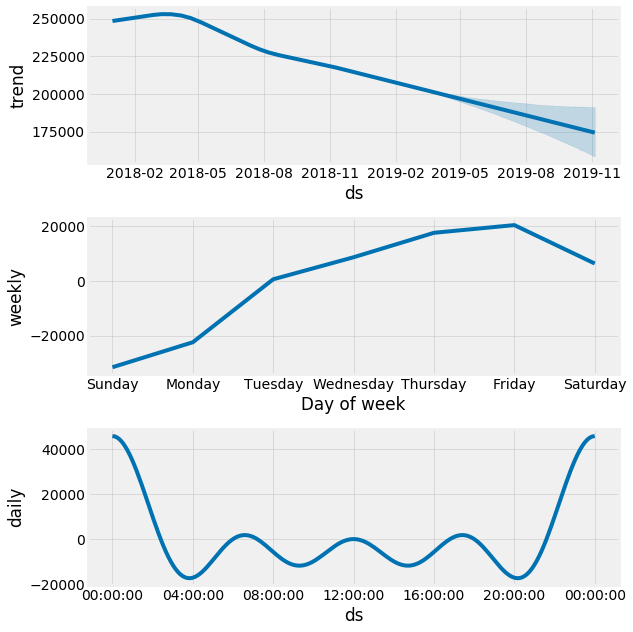

In [41]:
m1.plot_components(forcast1)

In [5]:
#Now for FHV 

df2 = pd.read_csv('app.csv')

In [6]:
print(df2)

      trip_date   count
0    2018-01-01  698979
1    2018-01-02  545299
2    2018-01-03  581361
3    2018-01-04  353283
4    2018-01-05  697102
..          ...     ...
329  2018-11-26  729771
330  2018-11-27  700371
331  2018-11-28  725189
332  2018-11-29  761560
333  2018-11-30  858924

[334 rows x 2 columns]


In [10]:
df2['trip_date'] = pd.to_datetime(df2['trip_date'])

In [11]:
df2.rename(columns={'count':'total_rides'}, inplace=True)

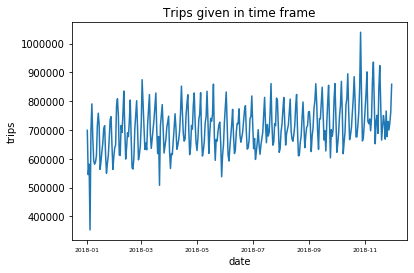

In [13]:
plt.plot(df2.trip_date, df2.total_rides)
plt.xlabel('date')
plt.ylabel('trips')
plt.title('Trips given in time frame')
plt.tick_params(axis='x', which='major', labelsize=6)


#The opposite is occuring with the passenger count for trips taking fhv cars

In [15]:
df2.columns = ['ds','y']
m2 = Prophet(daily_seasonality=True)
m2.fit(df2)
futures_forcast= m2.make_future_dataframe(periods=250)
forcast2=m2.predict(futures_forcast)
forcast2.tail().T

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,579,580,581,582,583
ds,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00,2019-08-07 00:00:00
trend,921765,922219,922672,923126,923580
yhat_lower,923838,818006,727912,751492,778047
yhat_upper,1.06475e+06,956545,869771,892910,917577
trend_lower,878454,878713,879054,879217,879264
trend_upper,967352,968136,968907,969633,970356
additive_terms,69574.1,-36085.4,-120127,-100386,-78798.9
additive_terms_lower,69574.1,-36085.4,-120127,-100386,-78798.9
additive_terms_upper,69574.1,-36085.4,-120127,-100386,-78798.9
daily,-42145.3,-42145.3,-42145.3,-42145.3,-42145.3


In [16]:
forcast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,567654.767324,514416.877724,617894.646322
1,2018-01-02,588146.235862,538291.621369,639882.645068
2,2018-01-03,610483.155151,557680.717158,659077.604975
3,2018-01-04,644247.752888,591389.389874,693399.280021
4,2018-01-05,707372.406492,653825.796203,757479.750801


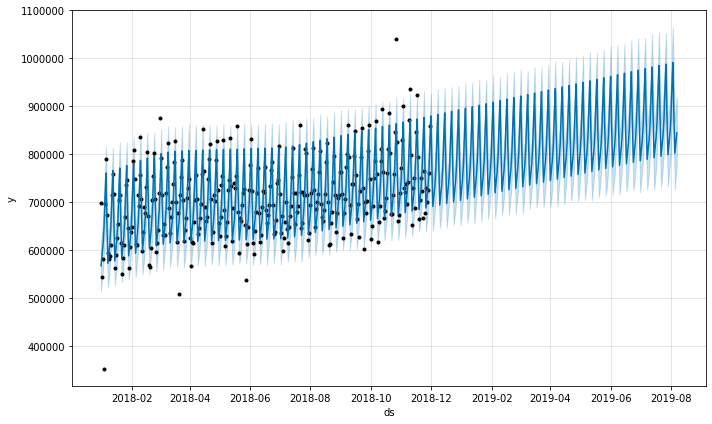

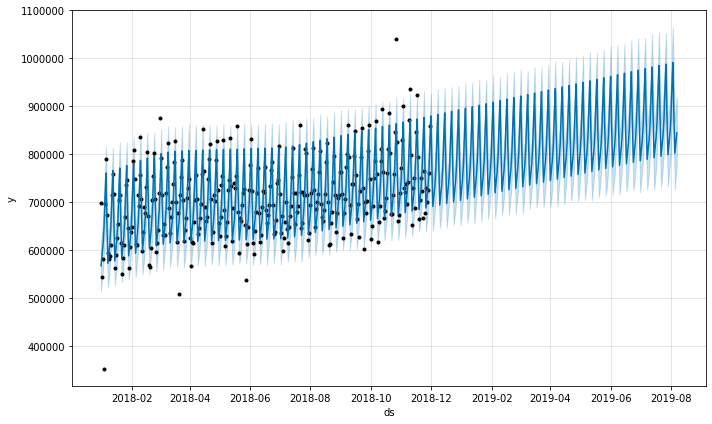

In [17]:
m2.plot(forcast2)


#The prediction shows an upward increase for passenger count 

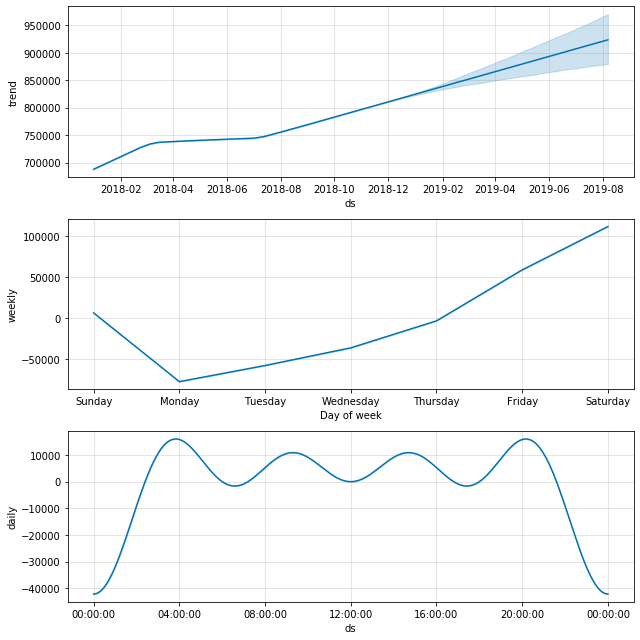

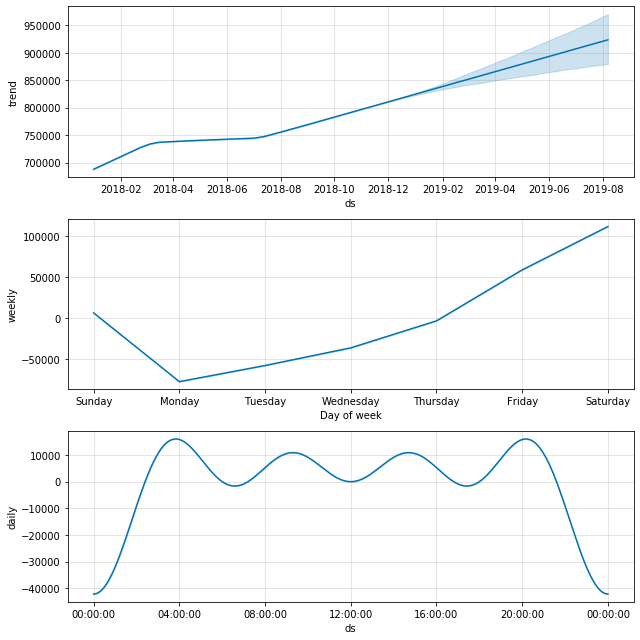

In [18]:
m2.plot_components(forcast2)
